### Rewards

### Testing model trained using DDPG + HER

In [8]:
# %matplotlib inline
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# function to open log and get reward
def getReward(log_dir):
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()
    series = ea.scalars.Items('Reward')
    rewards = [s.value for s in series]
    df = pd.DataFrame(rewards, columns=['Reward'])
    df['MeanReward'] = df['Reward'].rolling(window=100, min_periods=2).mean()
    df['SD'] = df['Reward'].rolling(window=200, min_periods=2).std()
    return df

In [10]:
df_train

,Reward,MeanReward,SD
0,-50.0,NaN,NaN
1,-50.0,-50.0,0.000000
2,-50.0,-50.0,0.000000
3,-50.0,-50.0,0.000000
4,-50.0,-50.0,0.000000
...,...,...,...
3995,-50.0,-49.9,0.429999
3996,-50.0,-49.9,0.429999
3997,-50.0,-49.9,0.429999
3998,-50.0,-49.9,0.429999


Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one metagraph event per run. Overwriting the metagraph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one metagraph event per run. Overwriting the metagraph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one metagraph event per run. Overwriting the metagraph with the newest event.


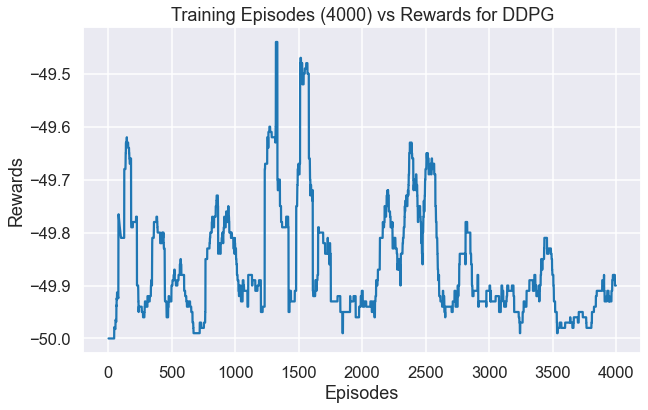

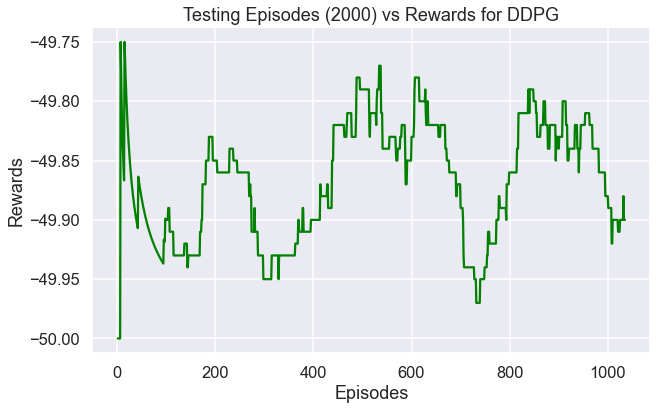

In [138]:
# load
log_dir = './FetchReach-v1_DDPG'
train_paths = [p for p in os.listdir(log_dir) if p.startswith('train_')]
train_paths.sort()
test_paths = [p for p in os.listdir(log_dir) if p.startswith('test_')]
test_paths.sort()

# look at first training session, first test session
df_train = getReward(os.path.join(log_dir, train_paths[0]))
df_test = getReward(os.path.join(log_dir, test_paths[0]))

plt.figure(figsize=(10,6))
plt.plot(df_train['MeanReward'].to_numpy())
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.title("Training Episodes (4000) vs Rewards for DDPG")
# plt.grid(which='both')
plt.savefig("DDPG_Train.png")


plt.figure(figsize=(10,6))
plt.plot(df_test['MeanReward'].to_numpy(),'g')
plt.xlabel("Episodes")
plt.ylabel("Rewards")
# plt.yticks([-i for i in range(0,60,5)])
plt.title("Testing Episodes (2000) vs Rewards for DDPG")
plt.savefig("DDPG_Test.png")

In [140]:
#stats -
max_r = np.max(df_train['Reward'].to_numpy()[1:])
max_r_c = np.count_nonzero(df_train['Reward'].to_numpy()[1:]==max_r)
min_r = np.min(df_train['Reward'].to_numpy()[1:])
min_r_c = np.count_nonzero(df_train['Reward'].to_numpy()[1:]==min_r)
print("Maximum Reward:{},Count: {}\n".format(max_r,max_r_c))
print("Minimum Reward:{} ,Count: {}\n".format(min_r,min_r_c))

Maximum Reward:-24.0,Count: 1

Minimum Reward:-50.0 ,Count: 3739



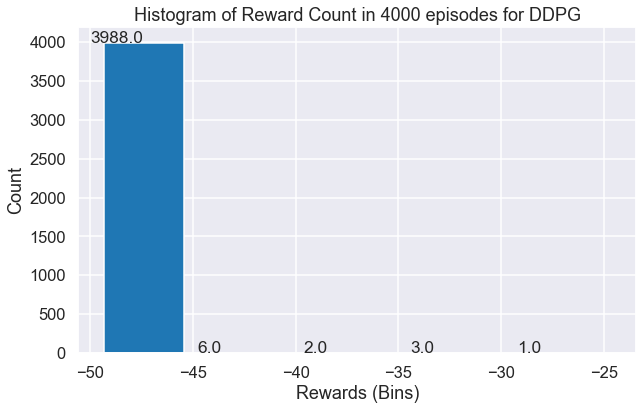

In [142]:
plt.figure(figsize=(10,6))
arr=plt.hist(df_train['Reward'].to_numpy(),5,rwidth=0.75)
plt.xlabel("Rewards (Bins)")
plt.ylabel("Count")
plt.title("Histogram of Reward Count in 4000 episodes for DDPG")
for i in range(arr[0].shape[0]):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]),fontsize="xx-large")
plt.savefig("DDPG_Train_Hist.png")

Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one metagraph event per run. Overwriting the metagraph with the newest event.


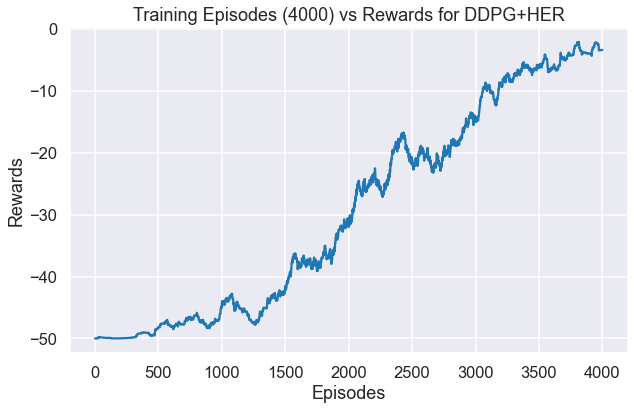

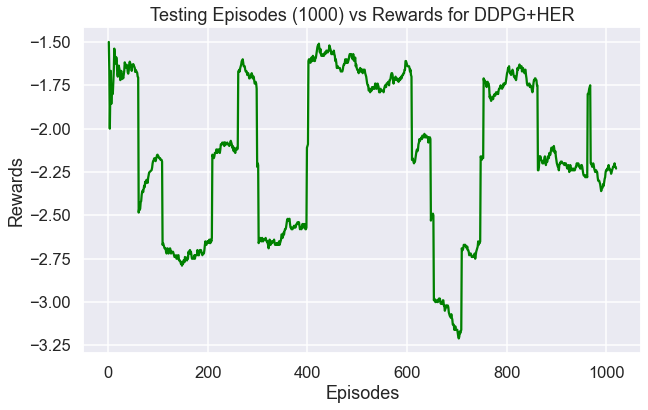

In [143]:
# load
log_dir = './FetchReach-v1_DDPG_HER'
train_paths = [p for p in os.listdir(log_dir) if p.startswith('train_')]
train_paths.sort()
test_paths = [p for p in os.listdir(log_dir) if p.startswith('test_')]
test_paths.sort()

# look at first training session, first test session
df_train = getReward(os.path.join(log_dir, train_paths[0]))
df_test = getReward(os.path.join(log_dir, test_paths[0]))

plt.figure(figsize=(10,6))
plt.plot(df_train['MeanReward'].to_numpy())
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.title("Training Episodes (4000) vs Rewards for DDPG+HER")
# plt.grid(axis='x')
plt.savefig("DDPG+HER_Train.png")


plt.figure(figsize=(10,6))
plt.plot(df_test['MeanReward'].to_numpy(),'g')
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.title("Testing Episodes (1000) vs Rewards for DDPG+HER")
# plt.grid(axis='x')
plt.savefig("DDPG+HER_Test.png")

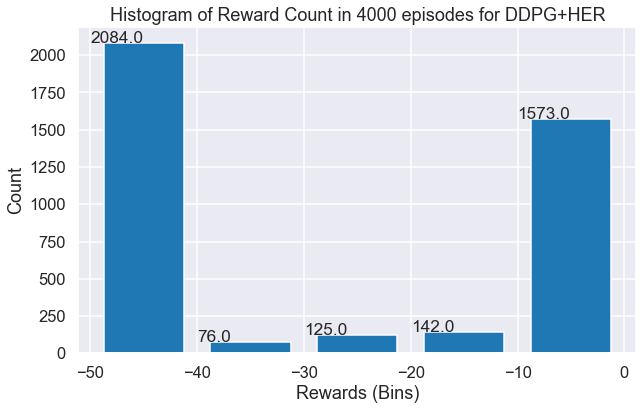

In [144]:
plt.figure(figsize=(10,6))
arr=plt.hist(df_train['Reward'].to_numpy(),5,rwidth=0.75)
plt.xlabel("Rewards (Bins)")
plt.ylabel("Count")
plt.title("Histogram of Reward Count in 4000 episodes for DDPG+HER")
for i in range(arr[0].shape[0]):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]),fontsize="xx-large")
plt.savefig("DDPGHER_Train_Hist.png")

In [145]:
#stats -
max_r = np.max(df_train['Reward'].to_numpy()[1:])
max_r_c = np.count_nonzero(df_train['Reward'].to_numpy()[1:]==max_r)
min_r = np.min(df_train['Reward'].to_numpy()[1:])
min_r_c = np.count_nonzero(df_train['Reward'].to_numpy()[1:]==min_r)
print("Maximum Reward:{},Count: {}\n".format(max_r,max_r_c))
print("Minimum Reward:{} ,Count: {}\n".format(min_r,min_r_c))

Maximum Reward:0.0,Count: 184

Minimum Reward:-50.0 ,Count: 1752

